In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import re
import sys 
import math

import cptac
import cptac.utils as u
import plot_utils as p

/Users/Lindsey/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
def myTrunc(theNumber, theDigits):

    myDigits = 10 ** theDigits
    return (int(theNumber * myDigits) / myDigits)

In [3]:
def plot_lin_regression(df1,x_axis, y_axis, hue, title = "Title", ra_stats = False, show_plot = True, x_coor= 1 , y_coor = 1, save_file_name = "file_name"):
    #format dfs 
    df1_subset = df1[[x_axis,y_axis,hue]]
    #df1_subset.columns = df1_subset.columns.droplevel(1)
    #def create_lin_reg_graph(df1, df2, x_axis, y_axis, title):
    df1_subset = df1_subset.dropna(axis=0, how="any")

    x1 = df1_subset[[x_axis]].values
    y1 = df1_subset[[y_axis]].values
    x1 = x1[:,0]
    y1 = y1[:,0]

    #slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x1,y1)
    corr, pval = scipy.stats.pearsonr(x1,y1)
        
    sns.set(style="darkgrid")
    plt.rcParams["figure.figsize"] = (30,22)
    graph = sns.lmplot(x= x_axis, y= y_axis, data=df1_subset, hue= hue, fit_reg=False)
    sns.regplot(x=x1, y=y1, data=df1_subset,scatter = False)
    graph.set(title = title)
   
    
    if ra_stats:
     
       
        pval = myTrunc(pval,9)
        corr = myTrunc(corr,3)
        #"Slope of regression: %s\nR-squared: %s\nPvalue: %s" %
        plt.text(x_coor,y_coor, "Correlation: %s\nPvalue: %s"%(corr,pval))
        
    if save_file_name != "file_name":
        
        #plt.tight_layout()
        plt.subplots_adjust(top=0.88)
        plt.savefig(save_file_name+'.png')
    if show_plot:
        plt.show()
        plt.clf()
        plt.close()
        
    
    

In [4]:
en = cptac.Endometrial()
hn = cptac.Hnscc()
l = cptac.Luad()
o = cptac.Ovarian()
c = cptac.Ccrcc()
col = cptac.Colon()
g = cptac.Gbm()
b = cptac.Brca()
lscc = cptac.Lscc()

cptac warning: The HNSCC data is currently strictly reserved for CPTAC investigators. Otherwise, you are not authorized to access these data. Additionally, even after these data become publicly available, they will be subject to a publication embargo (see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details). (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


cptac warning: The LUAD dataset is under publication embargo until July 01, 2020. CPTAC is a community resource project and data are made available rapidly after generation for community research use. The embargo allows exploring and utilizing the data, but analysis may not be published until after the embargo date. Please see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details. (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 3)


cptac warning: The GBM dataset is under publication embargo until March 01, 2021. CPTAC is a community resource project and data are made available rapidly after generation for community research use. The embargo allows exploring and utilizing the data, but analysis may not be published until after the embargo date. Please see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details. (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 7)


version 3scc v3.2.......                 


cptac warning: The LSCC data is currently strictly reserved for CPTAC investigators. Otherwise, you are not authorized to access these data. Additionally, even after these data become publicly available, they will be subject to a publication embargo (see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details). (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 9)


In [5]:
prot_hnscc = hn.get_proteomics()
prot_gbm = g.get_proteomics()
prot_en = en.get_proteomics()
prot_colon = col.get_proteomics()
prot_brca = b.get_proteomics()
prot_luad = l.get_proteomics()
prot_ovar = o.get_proteomics()
prot_ccrcc = c.get_proteomics()


In [32]:
prot_brca

#prot_brca.columns = prot_brca.columns.droplevel(1)

filter_col = [col for col in prot_hnscc if col.startswith("C5")]
filter_col

['C5', 'C5AR1', 'C5orf15', 'C5orf22', 'C5orf24', 'C5orf51']

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 93 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


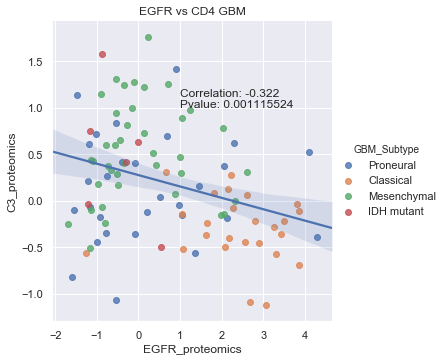

In [26]:
df1 = g.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["CD274","EGFR","JAK2","CD4","PTPN6","SPRY2","C3"])
#df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
subtype = g.get_derived_molecular()
subtype = subtype[["rna_wang_cancer_cell_2017"]]

subtype = subtype.rename(columns={"rna_wang_cancer_cell_2017": "GBM_Subtype"})
merged = pd.merge(df1, subtype, on = "Patient_ID", how = "outer")
plot_lin_regression(merged,"EGFR_proteomics","C3_proteomics", "GBM_Subtype",title = "EGFR vs CD4 GBM", ra_stats = True, show_plot = True)

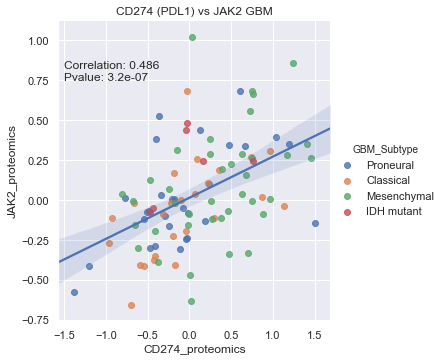

In [24]:
plot_lin_regression(merged,"CD274_proteomics","JAK2_proteomics", "GBM_Subtype",title = "CD274 (PDL1) vs JAK2 GBM", ra_stats = True, show_plot = True)

In [34]:
subtype = pd.read_csv("~/Documents/Hnscc_Table_S1.csv")
subtype = subtype.set_index("case_id")
subtype

,age,gender,country,smoking_history,smoke_age_start,smoke_age_stop,num_smoke_per_day,num_pack_years_sm,smoking_second_hand,smoking_inferred,...,tumor_pathology_review,ESTIMATE_stromal_score,ESTIMATE_immune_score,CD3_IHC_count,stemness_score,mutation_count,neoAntigen_count,chr_instability_idx,integrated_subtype,transcriptomic_subtype
case_id,,,,,,,,,,,,,,,,,,,,,
C3L-00977,56,Male,Russia,"Current reformed smoker, years unknown",NaN,NaN,20,NaN,Yes,strong_evidence,...,SCC 80%,6825.995755,7989.115925,1.0,0.953243,106,0,2.003654,Basal,Mesenchymal
C3L-00987,61,Male,Ukraine,Current smoker: Includes daily and non-daily s...,18,NaN,20,43.0,Yes,strong_evidence,...,SCC 90%;SCC 90%;SCC 80%;SCC 70%,5999.793467,4772.409716,0.0,0.825330,83,0,5.205612,CIN,Classical
C3L-00994,50,Male,Ukraine,Current reformed smoker within past 15 years,16,50,6,10.2,Exposure to secondhand smoke history not avail...,strong_evidence,...,SCC 40%;SCC 70%;SCC 40%;SCC 75%,8924.036564,8176.233903,5.0,0.664581,67,0,1.684475,Immune,Mesenchymal
C3L-00995,56,Male,Ukraine,"Current reformed smoker, more than 15 years",25,56,20,31.0,Exposure to secondhand smoke history not avail...,weak_evidence,...,SCC 90%;SCC 80%;SCC 40%;SCC 70%,8723.429667,8342.246345,70.0,0.539918,64,0,1.340483,Immune,Mesenchymal
C3L-00997,47,Male,Ukraine,"Current reformed smoker, more than 15 years",12,27,20,15.0,Yes,strong_evidence,...,SCC 70%;SCC 70%,7025.911695,7445.251991,60.0,0.843765,129,0,3.906370,CIN,Classical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C3N-04277,72,Male,Poland,Current smoker: Includes daily and non-daily s...,25,NaN,10,23.5,No or minimal exposure to secondhand smoke,strong_evidence,...,SCC 75%,7772.142353,8589.873314,70.0,0.575173,112,1,1.445849,Immune,Mesenchymal
C3N-04278,71,Male,Poland,Current reformed smoker within past 15 years,30,68,15,28.5,No or minimal exposure to secondhand smoke,strong_evidence,...,PD 70%,6713.956510,7074.622965,90.0,0.831637,289,0,4.498365,CIN,Classical
C3N-04279,65,Male,Poland,Current smoker: Includes daily and non-daily s...,20,NaN,15,33.8,No or minimal exposure to secondhand smoke,strong_evidence,...,PDCa 70%,4913.198110,5469.762929,20.0,0.862529,183,0,5.766584,Basal,Classical


In [35]:
subtype = subtype[["integrated_subtype"]]
subtype

,integrated_subtype
case_id,
C3L-00977,Basal
C3L-00987,CIN
C3L-00994,Immune
C3L-00995,Immune
C3L-00997,CIN
...,...
C3N-04277,Immune
C3N-04278,CIN
C3N-04279,Basal


cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 174 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


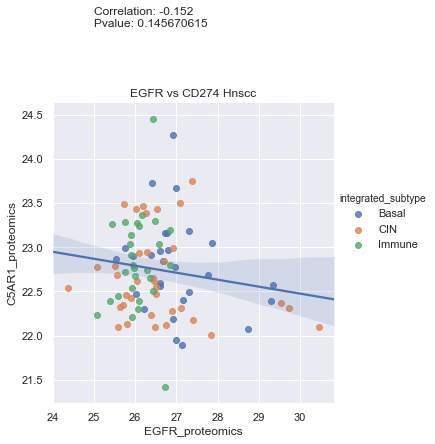

In [36]:
df1 = hn.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["CD274","EGFR","LAG3","C5AR1"])
#df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]

df1 = df1.join(subtype)

plot_lin_regression(df1,"EGFR_proteomics","C5AR1_proteomics", "integrated_subtype",title = "EGFR vs CD274 Hnscc", ra_stats = True, x_coor = 25, y_coor=25.5, show_plot = True)

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 174 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


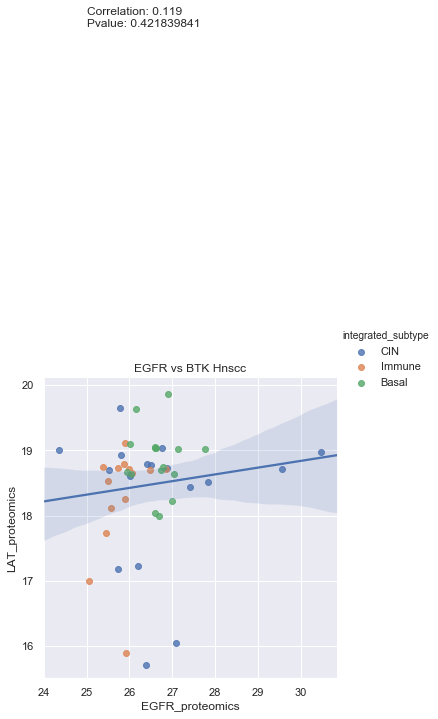

In [29]:
df1 = hn.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["BTK","EGFR","LAT"])
#df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
subtype = pd.read_csv("~/Documents/Hnscc_Table_S1.csv")
subtype = subtype.set_index("case_id")
df1 = df1.join(subtype)

plot_lin_regression(df1,"EGFR_proteomics","LAT_proteomics", "integrated_subtype",title = "EGFR vs BTK Hnscc", ra_stats = True, x_coor = 25, y_coor=25.5, show_plot = True)

In [33]:
 mut_type = hn.get_genotype_all_vars("JAK2")
  

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 108 samples for the JAK2 gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/cptac/dataset.py, line 311)
cptac warning: CNV data was not found for the following samples, so CNV data columns were filled with NaN for these samples: C3L-02617, C3N-02727 (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/cptac/dataset.py, line 311)


cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 174 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)
cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 108 samples for the JAK2 gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/cptac/dataset.py, line 311)
cptac warning: CNV data was not found for the following samples, so CNV data columns were filled with NaN for these samples: C3L-02617, C3N-02727 (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/cptac/dataset.py, line 311)


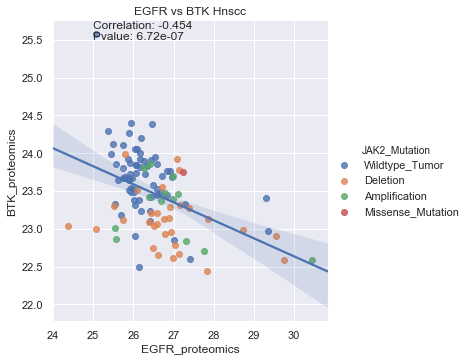

In [52]:
df1 = hn.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["BTK","EGFR"])
#df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]

mut_type = hn.get_genotype_all_vars("JAK2")
mut_type = mut_type.rename(columns={"Mutation": "JAK2_Mutation"})
df1 = df1.join(mut_type)

plot_lin_regression(df1,"EGFR_proteomics","BTK_proteomics", "JAK2_Mutation",title = "EGFR vs BTK Hnscc", ra_stats = True, x_coor = 25, y_coor=25.5, show_plot = True)

cptac warning: The following columns were not found in the proteomics dataframe, so they were inserted into joined table, but filled with NaN: CCL2, IL10 (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)
cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 174 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


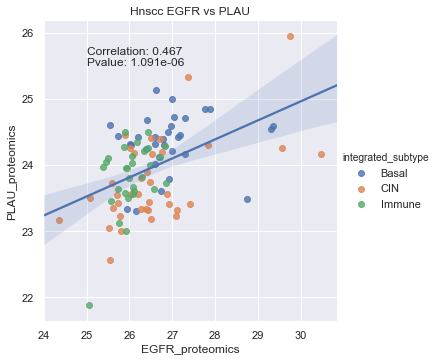

In [31]:
df1 = hn.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["CCL2","EGFR","CCL5","CXCL9","CXCL10","IL10","IL1B", "PLAU"])
#df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
subtype = pd.read_csv("~/Documents/Hnscc_Table_S1.csv")
subtype = subtype.set_index("case_id")
df1 = df1.join(subtype)

plot_lin_regression(df1,"EGFR_proteomics","PLAU_proteomics", "integrated_subtype",title = "Hnscc EGFR vs PLAU", ra_stats = True, x_coor = 25, y_coor=25.5, show_plot = True)

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 171 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


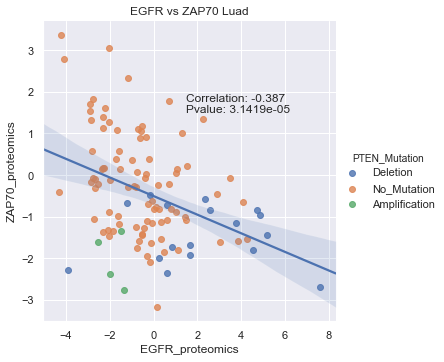

In [56]:
df1 = luad.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["ZAP70","EGFR"])
df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
mut_type = luad.get_genotype_all_vars("PTEN")
mut_type = mut_type.rename(columns={"Mutation": "PTEN_Mutation"})
df1 = df1.join(mut_type)

plot_lin_regression(df1,"EGFR_proteomics","ZAP70_proteomics", "PTEN_Mutation",title = "EGFR vs ZAP70 Luad", ra_stats = True, x_coor = 1.5, y_coor=1.5, show_plot = True)

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 171 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)
cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 108 samples for the JAK2 gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/cptac/dataset.py, line 311)


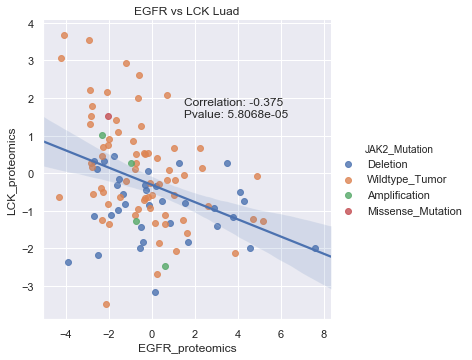

In [61]:
df1 = luad.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["LCK","EGFR"])
df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
mut_type = luad.get_genotype_all_vars("JAK2")
mut_type = mut_type.rename(columns={"Mutation": "JAK2_Mutation"})
df1 = df1.join(mut_type)

plot_lin_regression(df1,"EGFR_proteomics","LCK_proteomics", "JAK2_Mutation",title = "EGFR vs LCK Luad", ra_stats = True, x_coor = 1.5, y_coor=1.5, show_plot = True)

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 171 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


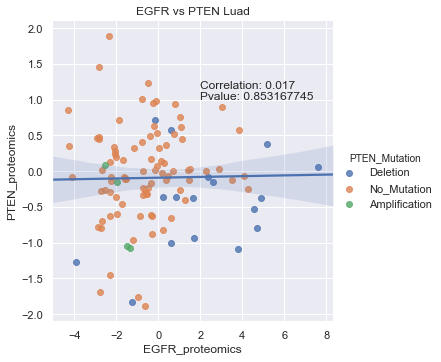

In [21]:
df1 = l.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["EGFR","PTEN"])

df1 = df1.drop(df1.columns[2], axis=1)
df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
mut_type = l.get_genotype_all_vars("PTEN")
mut_type = mut_type.rename(columns={"Mutation": "PTEN_Mutation"})
df1 = df1.join(mut_type)
df1
#df1 = df1.loc[df1['JAK2_Mutation'] != "Deletion"]
plot_lin_regression(df1,"EGFR_proteomics","PTEN_proteomics", "PTEN_Mutation",title =  "EGFR vs PTEN Luad", ra_stats = True, x_coor = 2, y_coor=1, show_plot = True)

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 174 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)
cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 109 samples for the PTEN gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/cptac/dataset.py, line 313)
cptac warning: CNV data was not found for the following samples, so CNV data columns were filled with NaN for these samples: C3L-02617, C3N-02727 (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/cptac/dataset.py, line 313)


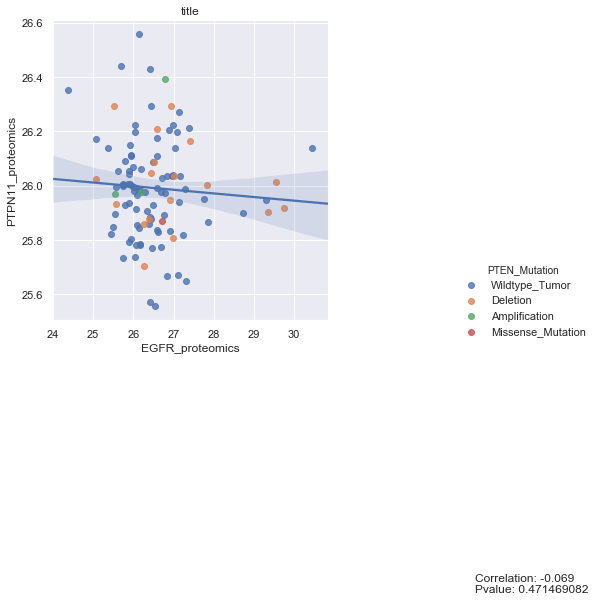

In [15]:
df1 = hn.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["IL2RG","EGFR","PTEN","TGFB2","TGFB1","PTPN11"])
df1 = df1.loc[:,~df1.columns.duplicated()]
#df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
mut_type = hn.get_genotype_all_vars("PTEN")
mut_type = mut_type.rename(columns={"Mutation": "PTEN_Mutation"})
df1 = df1.join(mut_type)

plot_lin_regression(df1,"EGFR_proteomics","PTPN11_proteomics", "PTEN_Mutation",title = "title", ra_stats = True, x_coor = 34.5, y_coor=24.5, show_plot = True)

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 140 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


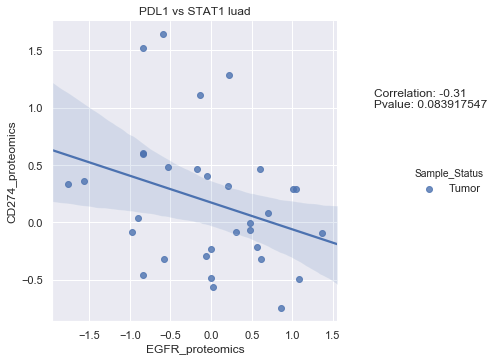

In [24]:
df1 = en.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["CD274","EGFR"])

#df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]

df1
#df1 = df1.loc[df1['JAK2_Mutation'] != "Deletion"]
plot_lin_regression(df1,"EGFR_proteomics","CD274_proteomics", "Sample_Status",title =  "PDL1 vs STAT1 luad", ra_stats = True, x_coor = 2, y_coor=1, show_plot = True)

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 118 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


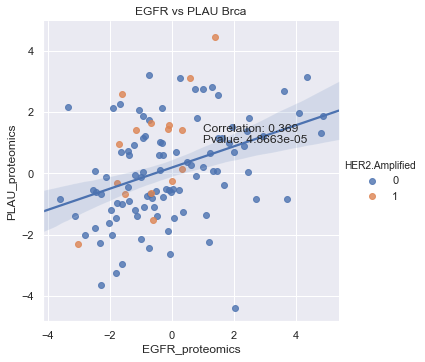

In [26]:
df1 = b.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["MMP9","EGFR","PLAU","PLAUR"])
df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
subtype = b.get_derived_molecular()
subtype = subtype[["HER2.Amplified"]]

#subtype = subtype.rename(columns={"rna_wang_cancer_cell_2017": "GBM_Subtype"})
merged = pd.merge(df1, subtype, on = "Patient_ID", how = "outer")
plot_lin_regression(merged,"EGFR_proteomics","PLAU_proteomics", "HER2.Amplified",title = "EGFR vs PLAU Brca", ra_stats = True, show_plot = True)

In [25]:
pd.set_option('display.max_columns', None)
subtype

Name,HER2.IHC.Score,HER2.FISH.Status,HER2.original,HER2.Amplified,HER2.refined,STARD3.ERBB2.GRB7.protein,HER2.class.Satpathy,HER2.status.Satpathy,PAM50.Her2.CNA,PAM50.Her2.HER2.status,CDH1.mutation,GATA3.mutation,MAP3K1.mutation,PIK3CA.mutation,PTEN.mutation,TP53.mutation,CDH1.mutation.status,GATA3.mutation.status,MAP3K1.mutation.status,PIK3CA.mutation.status,PTEN.mutation.status,TP53.mutation.status,Number.of.Mutations,Number.of.Mutated.Genes,Chromosome.INstability.index.CIN.,ESTIMATE.TumorPurity,ESTIMATE.ImmuneScore,ESTIMATE.StromalScore,xCell.ImmuneScore,xCell.StromaScore,Cibersort.Absolute.score,Stemness.Score
Patient_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CPT000814,NaN,NaN,negative,0,negative,0.0.0,NaN,0,NaN,NaN,,,,,,Frame_Shift_Del,0,0,0,0,0,1,81,56,6.327184,0.819666,846.350897,-812.409581,0.0414,0.0000,0.565019,0.798050
CPT001846,NaN,NaN,negative,0,negative,0.0.0,NaN,0,NaN,NaN,,,,Missense_Mutation,,Missense_Mutation,0,0,0,1,0,1,92,61,4.489557,0.631766,1425.391899,495.603750,0.0766,0.0236,0.785537,0.592100
X01BR001,0,not performed,negative,0,negative,0.0.0,True.clinical.ErbB2-,0,NaN,NaN,,,,,,Missense_Mutation,0,0,0,0,0,1,67,41,4.431358,0.822598,475.804314,-476.863678,0.0103,0.0088,0.454490,0.839483
X01BR008,NaN,NaN,negative,0,negative,0.0.0,True.clinical.ErbB2-,0,NaN,NaN,,,,,,Missense_Mutation,0,0,0,0,0,1,84,44,2.226126,0.535194,2809.591640,-77.281727,0.4840,0.0033,2.064309,0.599871
X01BR009,NaN,NaN,negative,0,negative,0.0.0,True.clinical.ErbB2-,0,NaN,NaN,,,,,,,0,0,0,0,0,0,31,25,5.514241,0.576875,1664.855380,725.734350,0.0926,0.0265,1.191462,0.437721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X21BR001,NaN,NaN,negative,1,negative,1.1.1,True.ErbB2+,1,NaN,NaN,,,,,,Missense_Mutation,0,0,0,0,0,1,276,191,3.359543,0.625141,2014.358538,-35.342048,0.1573,0.0040,1.085131,0.356452
X21BR002,NaN,NaN,negative,0,negative,0.0.0,True.clinical.ErbB2-,0,NaN,NaN,,,,Missense_Mutation,,,0,0,0,1,0,0,41,24,1.982001,0.543167,1956.585730,711.234125,0.1577,0.0136,0.959089,0.263092
X21BR010,1+,NaN,negative,0,negative,0.0.0,True.clinical.ErbB2-,0,NaN,NaN,,,,Missense_Mutation,,,0,0,0,1,0,0,42,21,2.663836,0.682815,628.877273,830.372368,0.0293,0.0195,0.267234,0.000000


In [55]:
df1 = hn.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["EGFR","F9","PLAU"])
#df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
subtype = hn.get_clinical()
#subtype = subtype[["histological_grade"]]

#ubtype = subtype.rename(columns={"mRNA.Expression.Subtype.TCGA": "TCGA_Subtype"})
#merged = pd.merge(df1, subtype, on = "Patient_ID", how = "outer")
#plot_lin_regression(merged,"EGFR_proteomics","PLAU_proteomics", "Stage",title = "EGFR vs PLAU Hnscc", ra_stats = True,x_coor = 2, y_coor=3.5, show_plot = True)

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 174 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


In [56]:
subtype

Name,Sample_Tumor_Normal,Cored_Sample,P16,age,alcohol_consum,clinic_staging_dist_metas,country,follow_up_days,follow_up_is_contact,follow_up_vital_status,gender,histologic_grade,histologic_type,num_pack_years_sm,num_smoke_per_day,num_yrs_alc_con,patho_staging_curated,patho_staging_orignial,patho_staging_pn,patho_staging_pt,smoke_age_start,smoke_age_stop,smoking_history,smoking_inferred_binary,smoking_second_hand,tumor_focality,tumor_necrosis,tumor_site_curated,tumor_site_original,tumor_size_cm
Patient_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
C3L-00977,Tumor,False,Not Evaluated,56.0,Lifelong non-drinker,cM0,Russia,377.0,No,Living,Male,G1 Well differentiated,"Squamous cell carcinoma, conventional",NaN,20,NaN,Stage III,Stage III,pN1,pT1,NaN,NaN,"Current reformed smoker, years unknown",strong_evidence,Yes,Unifocal,Not identified,Oral cavity,Floor of mouth,1.2
C3L-00987,Tumor,False,Not Evaluated,61.0,"Consumed alcohol in the past, but currently a ...",cM0,Ukraine,429.0,Yes,Living,Male,G2 Moderately differentiated,"Squamous cell carcinoma, conventional",43.0,20,30,Stage III,Stage III,pN1,pT2,18,NaN,Current smoker: Includes daily and non-daily s...,strong_evidence,Yes,Unifocal,Present,Oral cavity,Tongue,4.0
C3L-00994,Tumor,False,Not Evaluated,50.0,Alcohol consumption more than 2 drinks per day...,cM0,Ukraine,132.0,No,Deceased,Male,G2 Moderately differentiated,"Squamous cell carcinoma, conventional",10.2,6,32,Stage II,Stage II,pN0,pT2,16,50,Current reformed smoker within past 15 years,strong_evidence,Exposure to secondhand smoke history not avail...,Unifocal,Present,Oral cavity,Tongue,3.0
C3L-00995,Tumor,False,Not Evaluated,56.0,Alcohol consumption more than 2 drinks per day...,cM0,Ukraine,-10.0,No,Deceased,Male,G1 Well differentiated,"Squamous cell carcinoma, conventional",31.0,20,31,Stage III,Stage III,pN1,pT2,25,56,"Current reformed smoker, more than 15 years",weak_evidence,Exposure to secondhand smoke history not avail...,Unifocal,Not identified,Oral cavity,Buccal mucosa,4.0
C3L-00997,Tumor,False,Not Evaluated,47.0,Lifelong non-drinker,cM0,Ukraine,442.0,Yes,Living,Male,G2 Moderately differentiated,"Squamous cell carcinoma, conventional",15.0,20,NaN,Stage II,Stage III,pN1,pT2,12,27,"Current reformed smoker, more than 15 years",strong_evidence,Yes,Unifocal,Present,Oropharynx,Oropharynx,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C3N-04276.N,Normal,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C3N-04277.N,Normal,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C3N-04278.N,Normal,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
b.get_derived_molecular()

Name,HER2.IHC.Score,HER2.FISH.Status,HER2.original,HER2.Amplified,HER2.refined,STARD3.ERBB2.GRB7.protein,HER2.class.Satpathy,HER2.status.Satpathy,PAM50.Her2.CNA,PAM50.Her2.HER2.status,CDH1.mutation,GATA3.mutation,MAP3K1.mutation,PIK3CA.mutation,PTEN.mutation,TP53.mutation,CDH1.mutation.status,GATA3.mutation.status,MAP3K1.mutation.status,PIK3CA.mutation.status,PTEN.mutation.status,TP53.mutation.status,Number.of.Mutations,Number.of.Mutated.Genes,Chromosome.INstability.index.CIN.,ESTIMATE.TumorPurity,ESTIMATE.ImmuneScore,ESTIMATE.StromalScore,xCell.ImmuneScore,xCell.StromaScore,Cibersort.Absolute.score,Stemness.Score
Patient_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CPT000814,NaN,NaN,negative,0,negative,0.0.0,NaN,0,NaN,NaN,,,,,,Frame_Shift_Del,0,0,0,0,0,1,81,56,6.327184,0.819666,846.350897,-812.409581,0.0414,0.0000,0.565019,0.798050
CPT001846,NaN,NaN,negative,0,negative,0.0.0,NaN,0,NaN,NaN,,,,Missense_Mutation,,Missense_Mutation,0,0,0,1,0,1,92,61,4.489557,0.631766,1425.391899,495.603750,0.0766,0.0236,0.785537,0.592100
X01BR001,0,not performed,negative,0,negative,0.0.0,True.clinical.ErbB2-,0,NaN,NaN,,,,,,Missense_Mutation,0,0,0,0,0,1,67,41,4.431358,0.822598,475.804314,-476.863678,0.0103,0.0088,0.454490,0.839483
X01BR008,NaN,NaN,negative,0,negative,0.0.0,True.clinical.ErbB2-,0,NaN,NaN,,,,,,Missense_Mutation,0,0,0,0,0,1,84,44,2.226126,0.535194,2809.591640,-77.281727,0.4840,0.0033,2.064309,0.599871
X01BR009,NaN,NaN,negative,0,negative,0.0.0,True.clinical.ErbB2-,0,NaN,NaN,,,,,,,0,0,0,0,0,0,31,25,5.514241,0.576875,1664.855380,725.734350,0.0926,0.0265,1.191462,0.437721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X21BR001,NaN,NaN,negative,1,negative,1.1.1,True.ErbB2+,1,NaN,NaN,,,,,,Missense_Mutation,0,0,0,0,0,1,276,191,3.359543,0.625141,2014.358538,-35.342048,0.1573,0.0040,1.085131,0.356452
X21BR002,NaN,NaN,negative,0,negative,0.0.0,True.clinical.ErbB2-,0,NaN,NaN,,,,Missense_Mutation,,,0,0,0,1,0,0,41,24,1.982001,0.543167,1956.585730,711.234125,0.1577,0.0136,0.959089,0.263092
X21BR010,1+,NaN,negative,0,negative,0.0.0,True.clinical.ErbB2-,0,NaN,NaN,,,,Missense_Mutation,,,0,0,0,1,0,0,42,21,2.663836,0.682815,628.877273,830.372368,0.0293,0.0195,0.267234,0.000000
